<a href="https://colab.research.google.com/github/skerd2498/Salary-Prediction/blob/main/Belt_Exam_3_final_Skerdi_Mullaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('salary_train.csv') #loading our data
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [ ]:
df.info() #getting some info about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


Data Cleaning

In [ ]:
df.isna().sum() #checking for missing values

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

In [ ]:
#checking if id column is unique
df['Id'].is_unique

True

In [ ]:
print('Duplicated rows:', df.duplicated().sum()) #checking for duplicated rows

Duplicated rows: 0


In [ ]:
#filling missing values
df['SourceName']=df['SourceName'].fillna(df['SourceName'].mode()[0])
df['Title']=df['Title'].fillna(df['Title'].mode()[0])
df['ContractType']=df['ContractType'].fillna(df['ContractType'].mode()[0])
df['ContractTime']=df['ContractTime'].fillna(df['ContractTime'].mode()[0])
df['Company']=df['Company'].fillna(df['Company'].mode()[0])

In [ ]:
df.isna().sum() #checking again if we have any missing values left

Id                    0
Title                 0
FullDescription       0
LocationRaw           0
LocationNormalized    0
ContractType          0
ContractTime          0
Company               0
Category              0
SalaryRaw             0
SalaryNormalized      0
SourceName            0
dtype: int64

In [ ]:
#In the LocationRaw we had a value of "-" and in the column LocationNormalized we had value Halton. In another case where the
# column LocationNormalized one value was Halton, the locationRaw was 'Halton, North West'. So I replaced the value '-' with the
#value ''Halton, North West''
df['LocationRaw'] = df['LocationRaw'].replace(['-'],'Halton, North West')

Visualizations

Text(0.5, 1.0, 'Histogram')

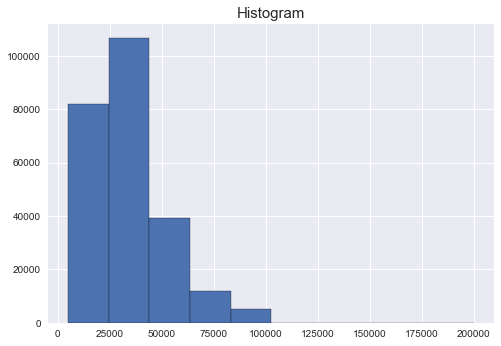

In [ ]:
#visualizing a histogram
plt.style.use('seaborn')
df["SalaryNormalized"].hist(edgecolor='black')
plt.title('Histogram',fontsize=15)

Text(0.5, 0, 'Count/Number')

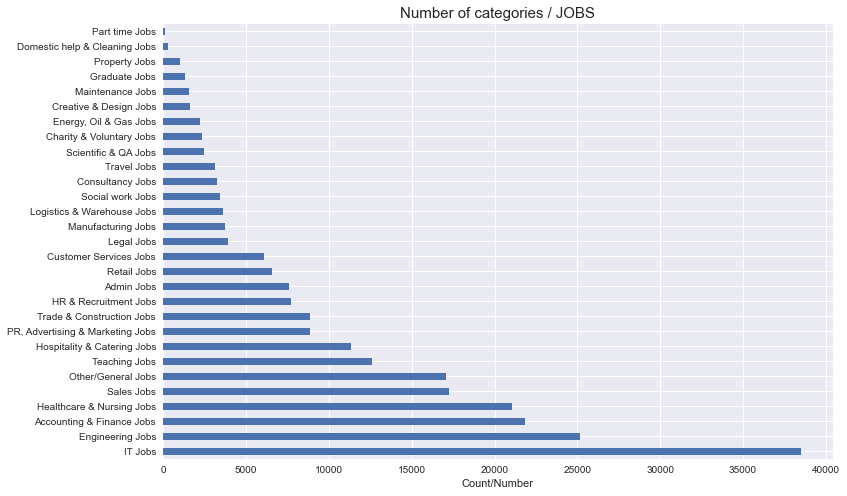

In [ ]:
fig = plt.figure(figsize = (12, 8))
df["Category"].value_counts().plot(kind='barh')
plt.title('Number of categories / JOBS',fontsize=15)
plt.xlabel('Count/Number',fontsize=11)


Text(0, 0.5, 'Count/Number')

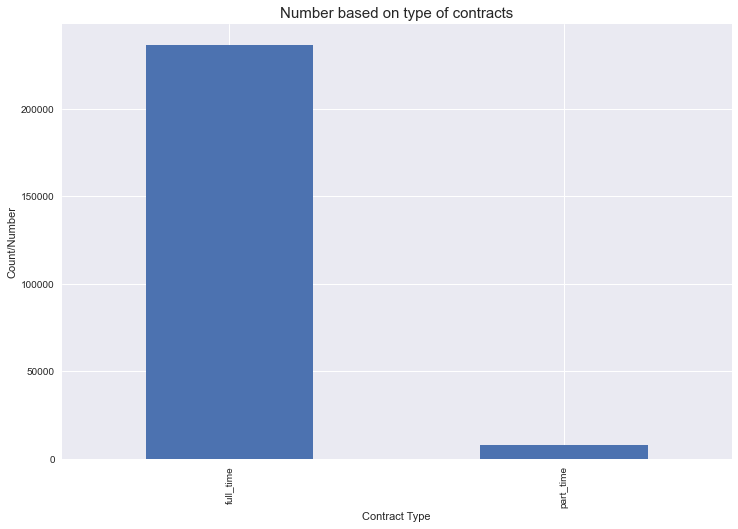

In [ ]:
fig = plt.figure(figsize = (12, 8))
df["ContractType"].value_counts().plot(kind="bar")
plt.title('Number based on type of contracts',fontsize=15)
plt.xlabel('Contract Type',fontsize=11)
plt.ylabel('Count/Number',fontsize=11)

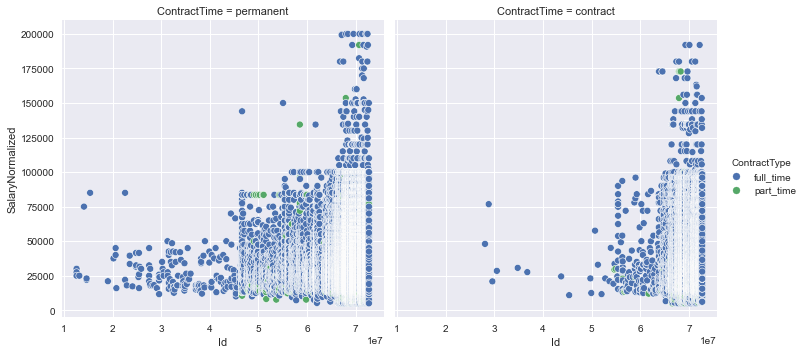

In [ ]:
 sns.relplot(data = df, x = "Id", y="SalaryNormalized",col=
"ContractTime", hue= "ContractType",
kind= "scatter")
plt.ticklabel_format(useOffset=False)


Dealing with categorical data

In [ ]:
df = pd.get_dummies(df, columns=['ContractType', 'ContractTime', 'Category'])
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,Company,SalaryRaw,SalaryNormalized,SourceName,ContractType_full_time,...,"Category_PR, Advertising & Marketing Jobs",Category_Part time Jobs,Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Gregory Martin International,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,1,...,0,0,0,0,0,0,0,0,0,0
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,Gregory Martin International,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,1,...,0,0,0,0,0,0,0,0,0,0
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Gregory Martin International,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,1,...,0,0,0,0,0,0,0,0,0,0
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Gregory Martin International,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,1,...,0,0,0,0,0,0,0,0,0,0
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Gregory Martin International,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,1,...,0,0,0,0,0,0,0,0,0,0


Building the model

In [ ]:
#dropping the features that we don't want
X = df.drop(columns=["SalaryNormalized","Id","Title","FullDescription","LocationRaw","LocationNormalized","Company","SalaryRaw","SourceName"],axis=1)
y = df["SalaryNormalized"] # our target

In [ ]:
# library for splitting the data
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

Random Forest

In [ ]:
#importing the librabry for Randomforest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Making an instance of the model
model = RandomForestRegressor(n_jobs=-1)

In [ ]:
#fitting the model
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#generating predictions on testing dataset
y_pred = model.predict(X_test)
y_pred

array([31204.86259481, 31888.68213178, 29956.86265302, ...,
       13898.95262498, 42317.43931144, 15952.45718702])

In [ ]:
metric=np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#printing RMSE on testing data
metric

15976.262025137152

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#importing libraries for pipeline and Standart Scaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
#generating predictions on testing dataset
y_pred1 = knn_pipe.predict(X_test)
y_pred1

array([34200. , 28601.6, 28501. , ..., 12276. , 46800. , 17560.8])

In [ ]:
#printing RMSE on testing dataset
metric1=np.sqrt(mean_squared_error(y_test, y_pred1))

In [ ]:
metric1

18534.01789609482

Lower values of RMSE indicate better fit, so we should choose Random Forest Model.